# Synthetic ECG sample maker
IMPORTANT: this notebook requires neurokit2 in the environment

In [1]:
import copy
import math
import collections
from scipy import interpolate as interp
from scipy import signal
import scipy
import pandas as pd
import glob
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import neurokit2 as nk
import resurfemg
import random
from resurfemg import config

In [2]:
t_ecg = 100
ecg_fs = 2048

In [3]:


hr= random.randint(60, 100)

part_ecg = nk.ecg_simulate(duration=t_ecg, sampling_rate=int(ecg_fs*1.5), heart_rate=hr) 

In [4]:
hr

96

In [5]:
part_ecg

array([ 1.10110972,  1.10016693,  1.09840163, ..., -0.26087484,
       -0.2694977 , -0.27908954])

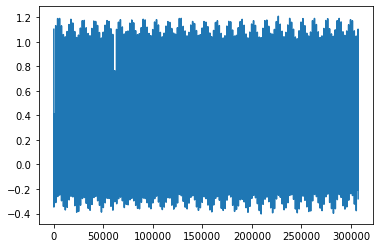

In [6]:
plt.plot(part_ecg)

Now we will make an 2D array of these

In [7]:
two_d = []
t_ecg = 100
ecg_fs = 2048
for i in list(range(10)):
    hr = random.randint(60, 100)
    part_ecg = nk.ecg_simulate(duration=t_ecg, sampling_rate=int(ecg_fs*1.5), heart_rate=hr) 
    two_d.append(part_ecg)
    
two_d = np.array(two_d)

In [8]:
two_d = np.array(two_d)
two_d.shape

(10, 307200)

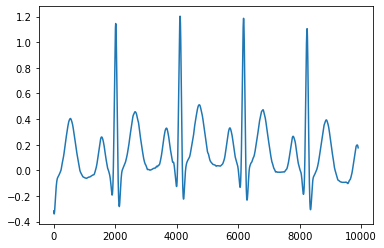

In [9]:
plt.plot(two_d[5][100:10000])

In [10]:
np.save('../synth_data/synth_ecg_array',two_d,allow_pickle=False, fix_imports=True)


Now we can later onto synthetic EMG

In [11]:
loaded_ecg = np.load('../synth_data/synth_ecg_array.npy')
loaded_ecg.shape

(10, 307200)

In [12]:
emg = config.simulate_emg_with_occlusions(t_start=0,
                                 t_end=7*60,
                                 emg_fs=2048,   # hertz
                                 rr=22,         # respiratory rate /min
                                 ie_ratio=1/2,  # ratio btw insp + expir phase
                                 tau_mus_up=0.3,
                                 tau_mus_down=0.3,
                                 occs_times_vals=[6*60+5, 6*60+21, 6*60+35])

In [13]:
emg.shape

(3, 860160)

In [14]:
emg1 = emg[0][:307200]
emg2 = emg[1][:307200]
emg3 = emg[2][:307200]
emg3.shape
emg_stack = np.vstack((emg1,emg2))
emg_stack = np.vstack((emg_stack,emg3))
emg_stack.shape[1]

307200

In [15]:
line = random.randint(0, 9)
one_line_ecg = loaded_ecg[line]

In [16]:
x_emg = np.zeros((3,emg_stack.shape[1]))
#x_emg.shape
x_emg[0] = 200*one_line_ecg + 0.05 * emg_stack[0]
x_emg[1] = 200*one_line_ecg + 4 * emg_stack[1]
x_emg[2] = 200*one_line_ecg + 8 * emg_stack[2]

In [17]:
x_emg.shape

(3, 307200)

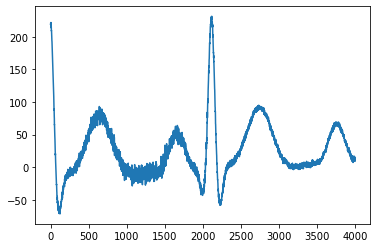

In [18]:
plt.plot(x_emg[1][:4000])

In [19]:
def make_realistic_syn_emg(loaded_ecg, number):
    list_ecg = []
    for i in list(range(number)):
        emg = config.simulate_emg_with_occlusions(t_start=0,
                                     t_end=7*60,
                                     emg_fs=2048,   # hertz
                                     rr=22,         # respiratory rate /min
                                     ie_ratio=1/2,  # ratio btw insp + expir phase
                                     tau_mus_up=0.3,
                                     tau_mus_down=0.3,
                                     occs_times_vals=[6*60+5, 6*60+21, 6*60+35])
        emg1 = emg[0][:307200]
        emg2 = emg[1][:307200]
        emg3 = emg[2][:307200]
        emg_stack = np.vstack((emg1,emg2))
        emg_stack = np.vstack((emg_stack,emg3))
        heart_line = random.randint(0, 9)
        one_line_ecg = loaded_ecg[heart_line]
        x_emg = np.zeros((3,emg_stack.shape[1]))
        x_emg[0] = 200*one_line_ecg + 0.05 * emg_stack[0]
        x_emg[1] = 200*one_line_ecg + 4 * emg_stack[1]
        x_emg[2] = 200*one_line_ecg + 8 * emg_stack[2]
        list_ecg.append(x_emg)
    return list_ecg
    

    

In [20]:
list_made = make_realistic_syn_emg(loaded_ecg, 5)

In [21]:
len(list_made)

5